<a href="https://colab.research.google.com/github/minkyung0114/DehazeNet-keras/blob/master/pm_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import os, re
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import DataFrame



In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
!ls "/gdrive/My Drive/Colab Notebooks/data/미세먼지 자료/image"

201009_100.jpg	201009_79.jpg	201010_57.jpg	201011_35.jpg	201012_13.jpg
201009_101.jpg	201009_7.jpg	201010_58.jpg	201011_36.jpg	201012_14.jpg
201009_102.jpg	201009_80.jpg	201010_59.jpg	201011_37.jpg	201012_15.jpg
201009_103.jpg	201009_81.jpg	201010_5.jpg	201011_38.jpg	201012_16.jpg
201009_104.jpg	201009_82.jpg	201010_60.jpg	201011_39.jpg	201012_17.jpg
201009_105.jpg	201009_83.jpg	201010_61.jpg	201011_3.jpg	201012_18.jpg
201009_106.jpg	201009_84.jpg	201010_62.jpg	201011_40.jpg	201012_19.jpg
201009_107.jpg	201009_85.jpg	201010_63.jpg	201011_41.jpg	201012_1.jpg
201009_108.jpg	201009_86.jpg	201010_64.jpg	201011_42.jpg	201012_20.jpg
201009_109.jpg	201009_87.jpg	201010_65.jpg	201011_43.jpg	201012_21.jpg
201009_10.jpg	201009_88.jpg	201010_66.jpg	201011_44.jpg	201012_22.jpg
201009_110.jpg	201009_89.jpg	201010_67.jpg	201011_45.jpg	201012_23.jpg
201009_111.jpg	201009_8.jpg	201010_68.jpg	201011_46.jpg	201012_24.jpg
201009_112.jpg	201009_90.jpg	201010_69.jpg	201011_47.jpg	201012_25.jpg
201009_113.j

In [4]:
np.random.seed(0)

In [5]:
INPUT_PATH =  "/gdrive/My Drive/Colab Notebooks/data/미세먼지 자료/image"
categories = ["poor","good", "moderate", "severe"]

In [6]:
in_list = os.listdir(INPUT_PATH)
in_list.sort()


In [7]:
os.listdir('/gdrive/My Drive/Colab Notebooks/data/미세먼지 자료/csv')

['201009_1.CSV', '201010_1.CSV', '201011_1.CSV', '201012_1.CSV']

In [8]:
csv_201009_1 = pd.read_csv(
    "/gdrive/My Drive/Colab Notebooks/data/미세먼지 자료/csv/201009_1.CSV", header=None, 
    names=["time", "sensor", "pm10", "pm25", "temp",
           "percentage", "Humidity", "local"], encoding="CP949")

csv_201010_1 = pd.read_csv(
    "/gdrive/My Drive/Colab Notebooks/data/미세먼지 자료/csv/201010_1.CSV", header=None,
    names=["time", "sensor", "pm10", "pm25", "temp",
           "percentage", "Humidity", "local"],encoding="CP949")

csv_201011_1 = pd.read_csv(
    "/gdrive/My Drive/Colab Notebooks/data/미세먼지 자료/csv/201011_1.CSV", header=None,
    names=["time", "sensor", "pm10", "pm25", "temp",
           "percentage", "Humidity", "local"],encoding="CP949")

csv_201012_1 = pd.read_csv(
    "/gdrive/My Drive/Colab Notebooks/data/미세먼지 자료/csv/201012_1.CSV", header=None,
    names=["time", "sensor", "pm10", "pm25", "temp",
           "percentage", "Humidity", "local"],encoding="CP949")

In [9]:
merged_csv = pd.concat([csv_201009_1, csv_201010_1,csv_201011_1,csv_201012_1], axis = 0, ignore_index=True)

merged_csv.head()


,time,sensor,pm10,pm25,temp,percentage,Humidity,local
0,2020/10/09??08:00,? 건설기술원 #1,14,10,14.6,52.9,"?경기 고양시 일산서구 대화동 2311 ( 37.672, 126.741 )",NaN
1,2020/10/09??08:05,? 건설기술원 #1,18,11,14.9,50.9,"?경기 고양시 일산서구 대화동 2311 ( 37.672, 126.741 )",NaN
2,2020/10/09??08:10,? 건설기술원 #1,30,13,15.2,49.2,"?경기 고양시 일산서구 대화동 2311 ( 37.672, 126.741 )",NaN
3,2020/10/09??08:15,? 건설기술원 #1,12,9,15.6,48.2,"?경기 고양시 일산서구 대화동 2311 ( 37.672, 126.741 )",NaN
4,2020/10/09??08:20,? 건설기술원 #1,14,9,15.9,47.4,"?경기 고양시 일산서구 대화동 2311 ( 37.672, 126.741 )",NaN


In [10]:
len(merged_csv)

480

In [11]:
len(merged_csv.pm25)

480

In [12]:
merged_csv_pm25 = merged_csv.pm25
merged_csv_pm25

0      10
1      11
2      13
3       9
4       9
       ..
475     6
476     8
477     5
478     7
479     7
Name: pm25, Length: 480, dtype: int64

In [13]:
Y = []

In [14]:
for i in range(0, len(merged_csv.pm25)):
    
    if int(merged_csv.pm25[i]) < 15:
        
        Y.append((0,1,0,0))
    
    elif int(merged_csv.pm25[i]) < 35:
        
        Y.append((0,0,1,0))
        
    elif int(merged_csv.pm25[i]) < 75:
        
         Y.append((1,0,0,0))
            
    else:
        Y.append((0,0,0,1))
  
    #Y.append((merged_csv.pm25[i]))

In [15]:
len(Y)


480

In [17]:
X = [] 
for i in range(len(in_list)):
    input_image = tf.io.read_file(INPUT_PATH + "/" + in_list[i])
    input_image = tf.image.decode_png(input_image, channels=3)
    input_image = tf.image.convert_image_dtype(input_image, tf.float32)
    input_image = tf.image.resize(input_image, [224, 224], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
   # input_image = tf.image.central_crop(input_image, 0.5)
    input_image = tf.image.flip_left_right(input_image)
    input_image = tf.image.random_flip_up_down(input_image, seed=None)

    input_image = np.asarray(input_image)
    X.append(input_image)

In [18]:
input_image.shape

(224, 224, 3)

In [19]:
def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

In [20]:
len(X)

480

In [21]:
len(Y)

480

In [22]:
Y = np.array(Y)

In [23]:
X = np.array(X)

In [24]:
X.shape

(480, 224, 224, 3)

In [25]:
Y.shape

(480, 4)

In [26]:
#학습전용 데이터와 테스트 전용 데이터 분류하기 

X_train, X_test, y_train, y_test =train_test_split(X,Y)
    
xy = (X_train, X_test, y_train, y_test)


In [27]:
os.listdir('pm_dataset/')

FileNotFoundError: ignored

In [28]:
np.save("/gdrive/My Drive/Colab Notebooks/data/미세먼지 자료/image/dataset.npy",xy)
print ("ok", len(Y))

ok 480


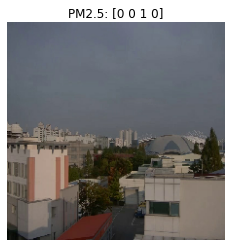

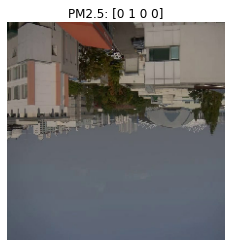

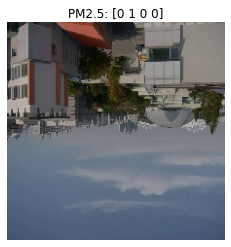

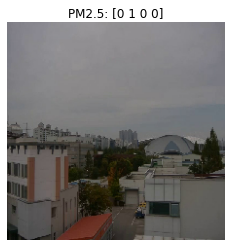

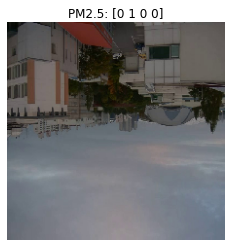

In [29]:
random_list_index = np.random.choice(np.arange(0, 480), 480, replace=False)
for i in range(5):
    show(X[random_list_index[i]], "PM2.5: " + str(Y[random_list_index[i]]))